In [27]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.externals import joblib

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [12]:
### Those parameters could be changed, depending on the dataset and the copmutation ###
# Number of different classes/labels 
num_classes = 10

# Number of image colour channels. 1 for gray scale, 3 for RGB
colour_channels = 1

# Parameters for training the model
batch_size = 128
epochs = 5

In [13]:
### To use different datasets, the following format must be followed:
### x_train_orig, x_test_orig - (number of samples, image rows, image cols)
### y_train_orig, y_test_orig - (number of samples,)

# Load the dataset
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = fashion_mnist.load_data()

y = 0


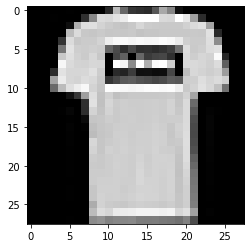

In [14]:
# Example of a picture in gray scale
index = 1
plt.imshow(x_train_orig[index], cmap='gray')
print ("y = " + str(np.squeeze(y_train_orig[index])))

In [15]:
# Number of testing and training examples
m_train = x_train_orig.shape[0]
m_test = x_test_orig.shape[0]

# Number of rows and cols in an image
img_rows = x_train_orig.shape[1]
img_cols = x_train_orig.shape[2]

# Reshape
x_train = x_train_orig.reshape(x_train_orig.shape[0], img_rows, img_cols, colour_channels)
x_test = x_test_orig.reshape(x_test_orig.shape[0], img_rows, img_cols, colour_channels)

In [16]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize image vectors
x_train /= 255
x_test /= 255

In [17]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train_orig, num_classes)
y_test = keras.utils.to_categorical(y_test_orig, num_classes)

In [9]:
# Shape of an image
input_shape = (img_rows, img_cols, colour_channels)

In [10]:
print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: " + str(input_shape))
print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))

Number of training examples: 60000
Number of testing examples: 10000
Each image is of size: (28, 28, 1)
x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


In [11]:
# Define CNN model
def model(input_shape):
    """
    Implementation of a CNN for image classification.
    
    Arguments:
    input_shape - shape of the images of the dataset

    Returns:
    model - a Model() instance in Keras
    """
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                    activation='relu',
                    input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [13]:
# Create the model
cnn_image_model = model(input_shape)

In [14]:
# Compile model
cnn_image_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Nadam(),metrics=['accuracy'])

In [15]:
# Train model
cnn_image_model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 92s 2ms/sample - loss: 0.5168 - acc: 0.8168 - val_loss: 0.3304 - val_acc: 0.8775
Epoch 2/5
60000/60000 [==============================] - 83s 1ms/sample - loss: 0.3370 - acc: 0.8809 - val_loss: 0.2846 - val_acc: 0.8982
Epoch 3/5
60000/60000 [==============================] - 84s 1ms/sample - loss: 0.2914 - acc: 0.8957 - val_loss: 0.2606 - val_acc: 0.9055
Epoch 4/5
60000/60000 [==============================] - 83s 1ms/sample - loss: 0.2596 - acc: 0.9054 - val_loss: 0.2467 - val_acc: 0.9107
Epoch 5/5
60000/60000 [==============================] - 84s 1ms/sample - loss: 0.2348 - acc: 0.9125 - val_loss: 0.2390 - val_acc: 0.9135


In [31]:
# Evaluate model
score = cnn_image_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2389760017454624
Test accuracy: 0.9135


In [76]:
# Save the entire model
cnn_image_model.save('part3/models/cnn_images_model')